<a href="https://colab.research.google.com/github/christinapitsillidou/hello-world/blob/master/SJ_CW_6humps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explain the concept in layman's terms

## 1. Why is gradient descent important in machine learning?

The purpose of machine learning is to provide systems with the ability to automatically learn and improve from experience without being explicitly programmed. To do that, we need to make some prediction functions and need to compare the results of the prediction functions with the real value. Between prediction functions, the one which has the most similar shape with the real value would be considered as the best prediction function. As a machine, the computer cannot tell which prediction function is closer to the real values without comparing numbers. 

Therefore, we use "cost function" to find better prediction function which is closer to the real values. Cost function could be defined in different ways but usually defined as the mean squared error.



## 2. How does plain vanilla gradient descent work?

## 3. Two modifications to plain vanilla gradient descent

# Plain vanilla gradient descent

### Import packages and define functions



In [0]:
import numpy as np

class gd_pv_2d:
    
    # Initialize gd_pv_2d class attributes, such as the loss function and the its partial derivatives
    def __init__(self, fn_loss, fn_grad_x1, fn_grad_x2): 
        self.fn_loss = fn_loss
        self.fn_grad_x1 = fn_grad_x1
        self.fn_grad_x2 = fn_grad_x2
        
    def find_min(self, x1_init, x2_init, n_iter, eta, tol):
        x1 = x1_init #starting point
        x2 = x2_init #starting point
                
        loss_path = [] #loss_path records the path of the loss function
        x1_path = [] #initialize x1_path as an empty matrix
        x2_path = []
        
        x1_path.append(x1) #put the starting point into the path
        x2_path.append(x2)
        
        loss_this = self.fn_loss(x1,x2) #evaluate loss function at starting point (x1,x2)
        loss_path.append(loss_this) #save this in loss_path matrix
        g1 = self.fn_grad_x1(x1,x2) #find partial derivarive wrt to x1(gradient) at starting point
        g2 = self.fn_grad_x2(x1,x2) #same for x2

        for i in range(n_iter): # loop until we iterate n_iter times or until both g1,g2 < tol
            if (abs(g1) < tol and abs(g2) < tol) or  np.isnan(g1) or  np.isnan(g2):
                break
            g1 = self.fn_grad_x1(x1,x2) # find g1
            g2 = self.fn_grad_x2(x1,x2)
            x1 += -eta * g1 # find new x1 which is x1 <- x1 - eta * g1
            x2 += -eta * g2
            x1_path.append(x1) #save new x1 to list x1_path
            x2_path.append(x2)
            loss_this = self.fn_loss(x1,x2) #calculate loss function and save it loss_path
            loss_path.append(loss_this)
        
        if  np.isnan(g1) or np.isnan(g2):
            print('Exploded')
        elif  np.abs(g1) > tol or  np.abs(g2) > tol:
            print('Did not converge')
        else:
            print('Converged in {} steps.  Loss fn {} achieved by (x1,x2) = ({},{})'.format(i+1, np.round(loss_this, 12),np.round(x1, 7), np.round(x2, 7)))
            #print('The minimum of the loss function is {}'.format())
            #print('The value of x1 which generates the minimum is {}'.format())
            #print('The value of x2 which generates the minimum is {}'.format())
            #print('The number of steps is {}'.format(np.round(i+1,7)))    
        
        #self.loss_path = np.array(loss_path)
        #self.x_path = np.array(x_path)
        self.loss_path = loss_path
        self.x1_path = x1_path
        self.x2_path = x2_path
        self.loss_fn_min = loss_this
        self.x1_at_min = x1
        self.x2_at_min = x2
        self.x1_g = g1
        self.x2_g = g2
        self.num_steps = i+1
        
    def momentum(self, x1_init, x2_init, n_iter, eta, tol, alpha):
        x1 = x1_init
        x2 = x2_init
        
        loss_path = []
        x1_path = []
        x2_path = []
        
        x1_path.append(x1)
        x2_path.append(x2)
        loss_this = self.fn_loss(x1,x2)
        loss_path.append(loss_this)
        g1 = self.fn_grad_x1(x1,x2)
        g2 = self.fn_grad_x2(x1,x2)
        
        nu1 = 0
        nu2 = 0

        for i in range(n_iter):
            g1 = self.fn_grad_x1(x1,x2)
            g2 =  self.fn_grad_x2(x1,x2)

            if (abs(g1) < tol and abs(g2) < tol) or  np.isnan(g1) or  np.isnan(g2):
                break
                
            nu1 = alpha * nu1 + eta * g1
            nu2 = alpha * nu2 + eta * g2
            x1 += -nu1
            x2 += -nu2
            x1_path.append(x1)
            x2_path.append(x2)
            loss_this = self.fn_loss(x1,x2)
            loss_path.append(loss_this)

        if  np.isnan(g1) or np.isnan(g2):
            print('Exploded')
        elif  np.abs(g1) > tol or  np.abs(g2) > tol:
            print('Did not converge')
        else:
            print('Converged in {} steps.  Loss fn {} achieved by (x1,x2) = ({},{})'.format(i+1, np.round(loss_this, 12),np.round(x1, 7), np.round(x2, 7)))
       
        self.loss_path = loss_path
        self.x1_path = x1_path
        self.x2_path = x2_path
        self.loss_fn_min = loss_this
        self.x1_at_min = x1
        self.x2_at_min = x2
        self.x1_g = g1
        self.x2_g = g2
        self.num_steps = i+1

#SIX-HUMP CAMEL FUNCTION
#http://www.sfu.ca/~ssurjano/camel6.html


In [0]:
#BOOTH FUNCTION
def fn_loss(x1,x2):
    return (4 - 2.1*x1**2 + (x1**4)/3)*x1**2 + x1*x2 + (-4 + 4*x2**2)*x2**2

def fn_grad_x1(x1,x2):    # partial derivative wrt x1
    return 8*x1 - 8.4*x1**3 + 2*x1**5 + x2

def fn_grad_x2(x1,x2):  # partial derivative wrt x2
    return x1 - 8*x2 + 16*x2**3

In [0]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad_x1 = fn_grad_x1 , fn_grad_x2 = fn_grad_x2) # using the gd_pv_2d function

In [142]:
x1_init = 1
x2_init = 1
n_iter = 100000
solver.find_min(x1_init, x2_init, n_iter, eta = 0.001, tol = 1e-5) #use function find_min from solver class to minimize the loss function 
#2 minima at +-(-0.0898,0.7126)

Converged in 1839 steps.  Loss fn -1.031628453483 achieved by (x1,x2) = (-0.0898407,0.7126563)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'loss')

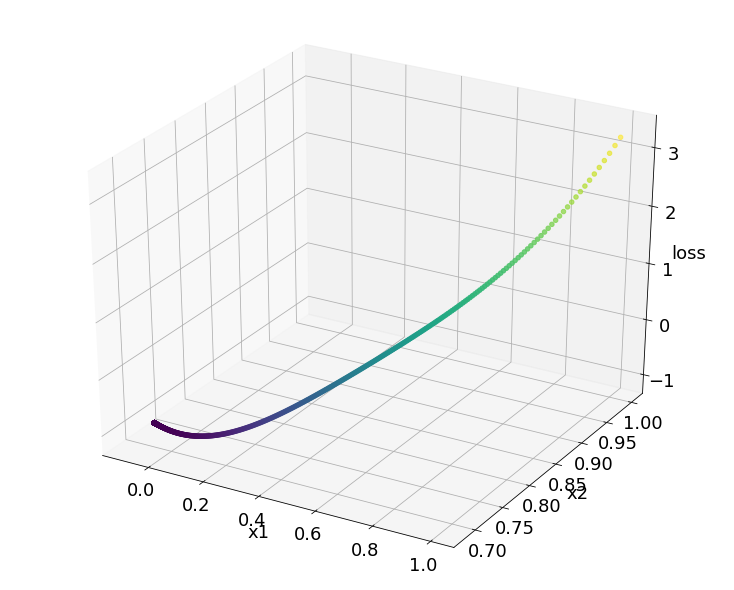

In [143]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = solver.loss_path)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('loss')


In [0]:
step_size = []
number_of_step = []

for j in range(1,1000):
    r = j/2000
    toler = 1e-10
    solver.find_min(x1_init = 1, x2_init = 1, n_iter = 10000, eta = r, tol = toler)
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    number_of_step.append(solver.num_steps)
    

Text(0.5, 1.0, 'Number of iterations against step size')

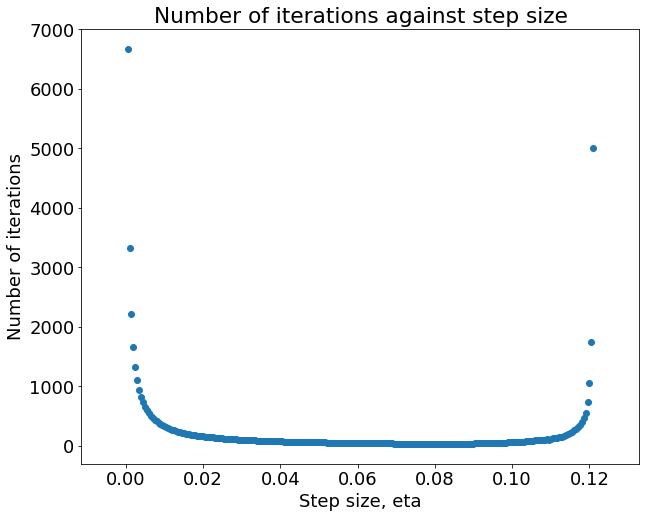

In [137]:
font = {'size': 18}
matplotlib.rc('font', **font)


fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size,  number_of_step)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Number of iterations')
plt.title("Number of iterations against step size")

In [0]:
import time

run_time = []
step_size = [] 

for j in range(1,1000):
    r = j/2000
    time_taken = 0
    start_time = time.clock()
    solver.find_min(x1_init =1, x2_init = 1, n_iter = 10000, eta = r, tol = toler)
    time_taken = time.clock() - start_time
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    run_time.append(time_taken)    

Text(0, 0.5, 'Time taken for convergence')

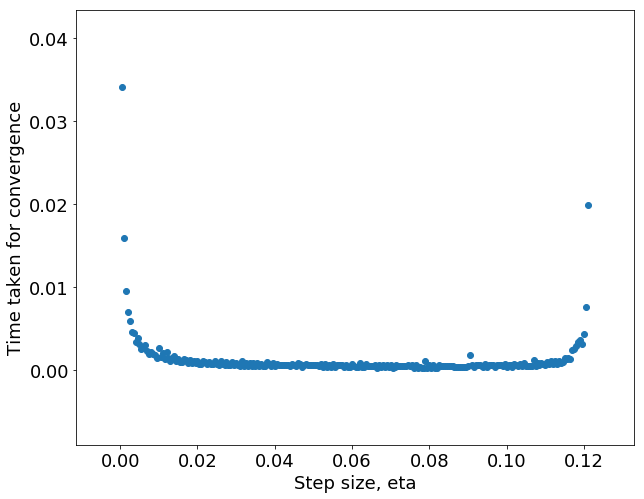

In [139]:
font = {'size': 18}
matplotlib.rc('font', **font)


fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size, run_time)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Time taken for convergence')

Did not converge
Converged in 32026 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)
Converged in 3194 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)
Converged in 311 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)
Converged in 53 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)


Text(0, 0.5, 'Loss path')

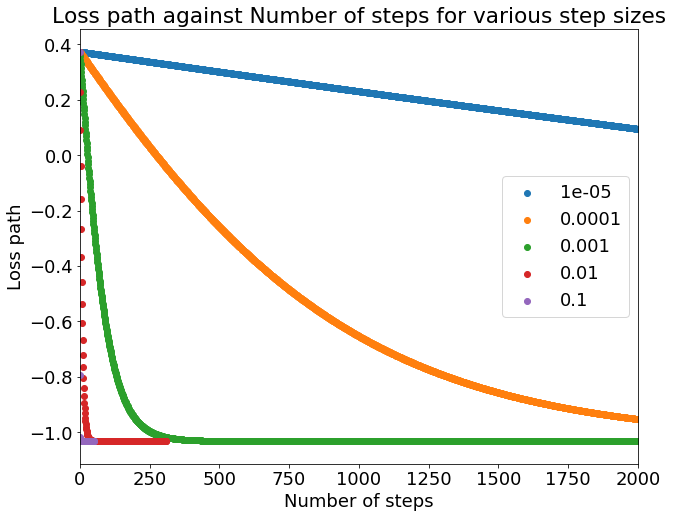

In [140]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.00001, 0.0001, 0.001, 0.01, 0.1]
for r in eta :
    solver.find_min(x1_init =0.5, x2_init = 0.5, n_iter = 50000, eta = r, tol = toler)
    x_range = range(len(solver.loss_path))
    ax1.scatter(x_range, solver.loss_path)      
#ax1.scatter(x_range, solver.loss_path)
plt.xlim((0,2000))
plt.title("Loss path against Number of steps for various step sizes")
ax1.legend(eta)
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')

Did not converge


Text(0, 0.5, 'loss')

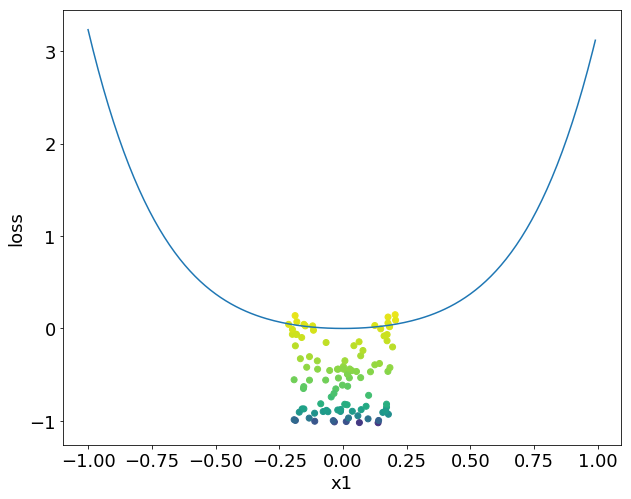

In [141]:
solver.find_min(x1_init = 0.5, x2_init = 0.5, n_iter= 50000, eta = 0.21, tol = 1e-10)

x_range = np.arange(-1, 1 , 0.01)
y_range = fn_loss(x_range,x_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x_range, y_range)
#ax1.scatter(solver.x1_path, solver.loss_path, color=colours)
ax1.scatter(solver.x1_path[500:600], solver.loss_path[500:600], color = colours[500:600])
ax1.set_xlabel('x1')
ax1.set_ylabel('loss')

# Momentum

##Check with momentum solver

In [134]:
x1_init = 1
x2_init = 1
n_iter = 100000
solver.momentum(x1_init, x2_init, n_iter, eta = 0.001, tol = 1e-5, alpha = 0.90) #use function find_min from solver class to minimize the loss function 
#2 minima at +-(-0.0898,0.7126)

Converged in 259 steps.  Loss fn -1.031628453485 achieved by (x1,x2) = (-0.0898431,0.7126567)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Text(0.5, 0, 'loss')

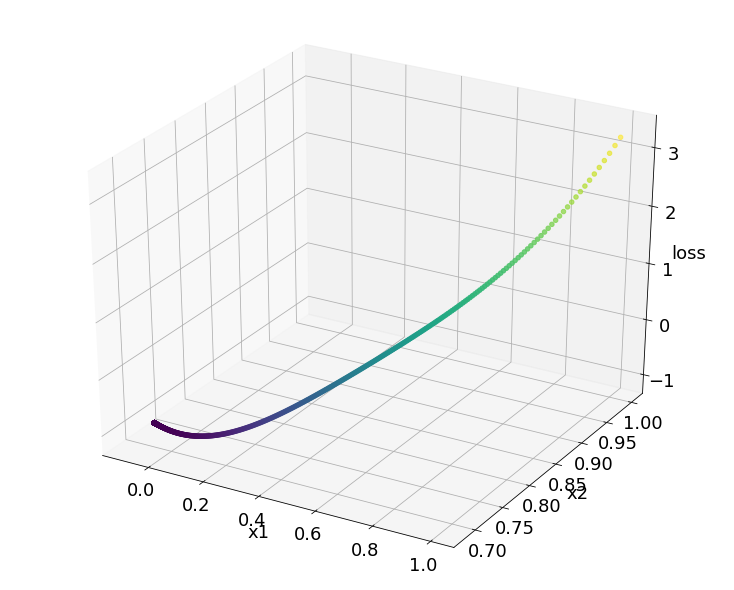

In [144]:
font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
ax.scatter(xs=solver.x1_path,ys=solver.x2_path,zs=solver.loss_path,c = solver.loss_path)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('loss')

In [0]:
step_size = []
number_of_step = []

for j in range(1,1000):
    r = j/2000
    toler = 1e-10
    solver.momentum(x1_init = 1, x2_init = 1, n_iter = 10000, eta = r, tol = toler, alpha = 0.90)
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    number_of_step.append(solver.num_steps)

Text(0.5, 1.0, 'Number of iterations against step size')

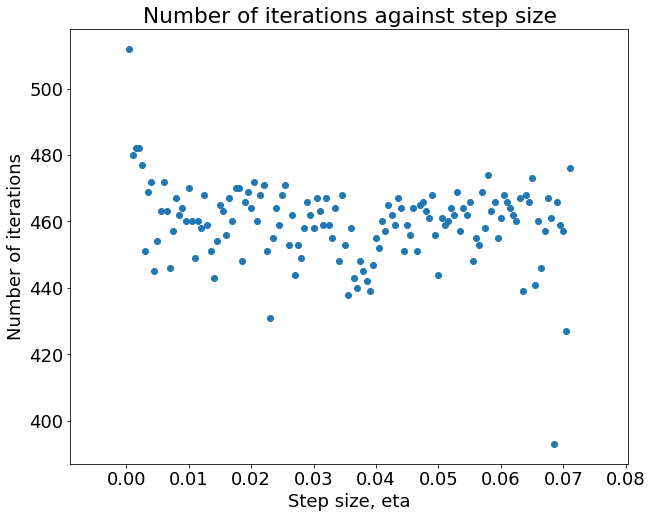

In [146]:
font = {'size': 18}
matplotlib.rc('font', **font)


fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size,  number_of_step)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Number of iterations')
plt.title("Number of iterations against step size")

In [0]:
run_time = []
step_size = [] 

for j in range(1,1000):
    r = j/2000
    time_taken = 0
    start_time = time.clock()
    solver.momentum(x1_init =1, x2_init = 1, n_iter = 10000, eta = r, tol = toler, alpha=0.90)
    time_taken = time.clock() - start_time
    if solver.x1_g > toler or  solver.x2_g > toler :
      break
    step_size.append(r)
    run_time.append(time_taken)  

Text(0, 0.5, 'Time taken for convergence')

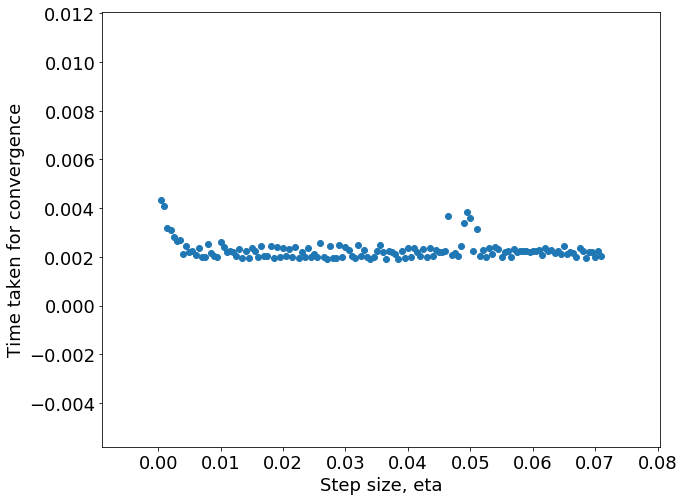

In [150]:
font = {'size': 18}
matplotlib.rc('font', **font)


fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(step_size, run_time)
ax1.set_xlabel('Step size, eta')
ax1.set_ylabel('Time taken for convergence')

Converged in 31814 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)
Converged in 2964 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)
Converged in 459 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)
Converged in 444 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)
Converged in 456 steps.  Loss fn -1.03162845349 achieved by (x1,x2) = (-0.089842,0.7126564)


Text(0, 0.5, 'Loss path')

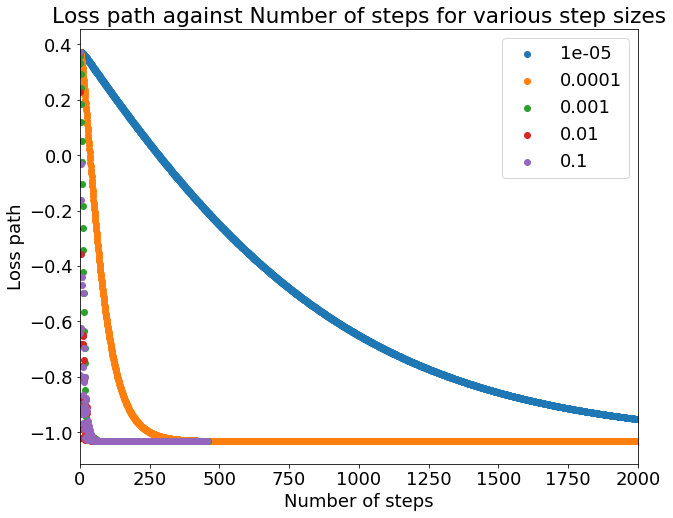

In [151]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.00001, 0.0001, 0.001, 0.01, 0.1]
for r in eta :
    solver.momentum(x1_init =0.5, x2_init = 0.5, n_iter = 50000, eta = r, tol = toler, alpha = 0.90)
    x_range = range(len(solver.loss_path))
    ax1.scatter(x_range, solver.loss_path)      
#ax1.scatter(x_range, solver.loss_path)
plt.xlim((0,2000))
plt.title("Loss path against Number of steps for various step sizes")
ax1.legend(eta)
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')